# Lecture 06. Transformation and Warping

## 1. Motivation

#### Why don't these images line up exactly?

<br/>

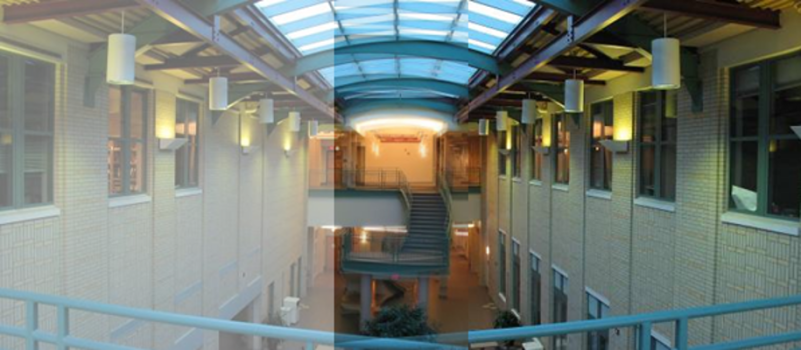

<br/>

#### What is the geometric relationship between above two images?
- It is very important for creating mosaics!
- **Step1.** : we need to know what this **transformation** is
- **Step2.** : we need to figure out how to compute it using feature matches

--------------------------

## 2. Image Warping

### 2-1. Difference between Filtering and Warping

#### Image Filtering
- Change **range** of image

$$ g(x) = h(f(x)) $$

<br/>

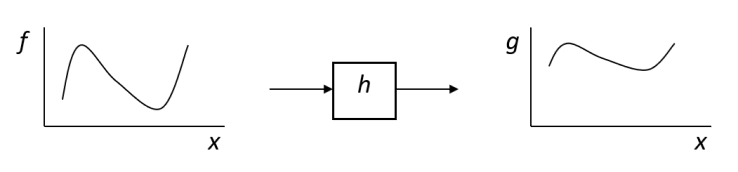

<br/>


#### Image Warping
- Change **domain** of image
- Warping is main category of image transformation

$$ g(x) = f(h(x)) $$

<br/>

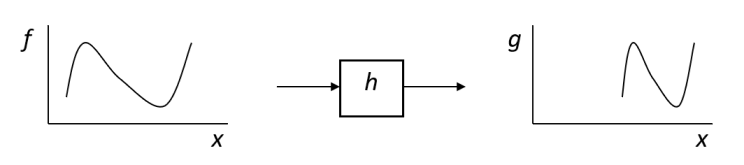

<br/>

### 2-2. Parametric (Global) Warping

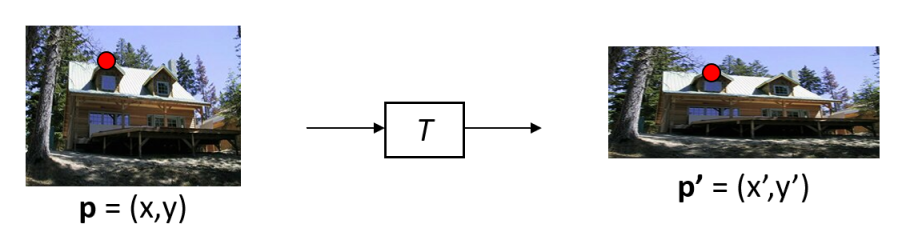

<br/>

- Transformation $T$ is a coordinate-changing machine : $p' = T(p)$
- What does it mean that $T$ is global?
    - Same for any point $p$
    - Can be described by just a few numbers (parameters)
- Let's consider it as linear transform (can be represented by a 2x2 matrix) :

<br/>

$$ 
p' = Tp 
\;\;\;\;\;\;\;
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
= T
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

<br/>

- Contains translation, rotation, aspect, **affine**, **perspective**, cylindrical warping(transformation)

### 2-3. Linear Transformation

#### Linear transformations are combinations of
- Scale, Rotation, Shear, Mirror, etc.
- Can be represented as a 2x2 matrix form

<br/>

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix} =
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

<br/>

#### Properties of Linear Transformation
- **Origin maps to origin**
- Lines map to lines
- Parallel lines remain parallel
- Ratios are preserved
- Closed under composition

In [1]:
# load an image for displaying examples
import cv2
import numpy as np
from skimage import transform as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

img = cv2.imread("images/lake.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# utility function for displaying multiple images
# code source : https://github.com/MLman/computer-vision-AAA534/blob/master/01-image%20filtering/01-linear%20filtering.ipynb
def ShowImgs(images, titles, row, column, size):
    fig = plt.figure(figsize = size)
    for i in range(len(images)):
        fig.add_subplot(row, column, i+1), plt.imshow(images[i], cmap="gray"), plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

##### 2-3-1. Scailing

$$
S = 
\begin{bmatrix}
s & 0 \\
0 & s
\end{bmatrix} \;\;\;\;\;\;\;\;\;\;\;\;
S^{-1} =
\begin{bmatrix}
\frac{1}{s} & 0 \\
0 & \frac{1}{s}
\end{bmatrix}
$$

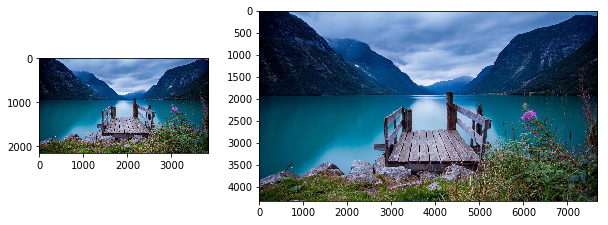

In [2]:
# scale by x2
img_scaled = cv2.resize(img, None, fx=2., fy=2., interpolation=cv2.INTER_LINEAR)

# plot the images
f = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.imshow(img)
ax2.imshow(img_scaled)
plt.show()

##### 2-3-2. Rotation

$$
R = 
\begin{bmatrix}
\cos{\theta} & -\sin{\theta} \\
\sin{\theta} & \cos{\theta}
\end{bmatrix} \;\;\;\;\;\;\;\;\;\;\;\;
R^{-1} = R^{T} =
\begin{bmatrix}
\cos{\theta} & \sin{\theta} \\
-\sin{\theta} & \cos{\theta}
\end{bmatrix}
$$

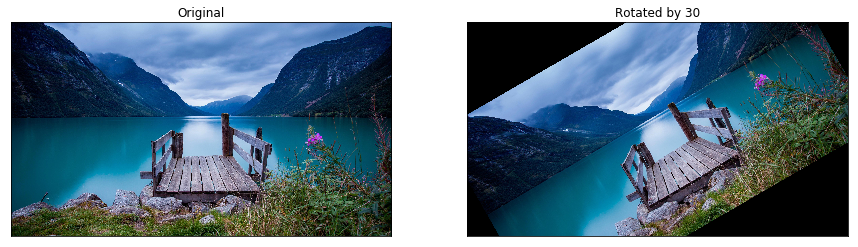

In [3]:
# get matrix for rotating by 30 degree with counter-clockwise
rows, cols = img.shape[:-1]
rotation_mat = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1.)

# apply transformation
# rotation can be considered as an affine warping, so we use warpAffin()
img_rotated = cv2.warpAffine(img, rotation_mat, (cols, rows))

# plot images
ShowImgs([img, img_rotated], ["Original", "Rotated by 30"], 1, 2, (15, 15))

##### 2-3-3. Mirror

$$
T = 
\begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix} \;\;\; : \text{2D mirror across Y axis} \\
T = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix} \;\;\; : \text{2D mirror across line y=x}
$$

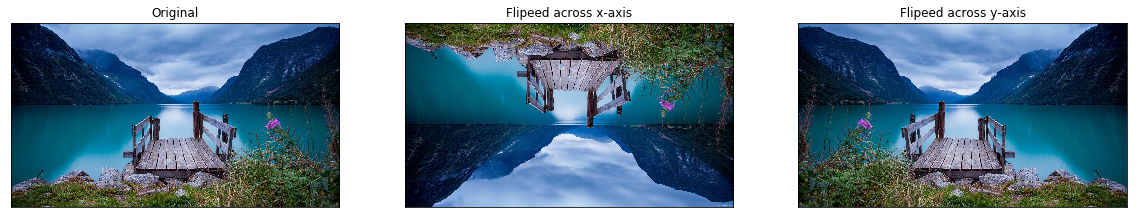

In [4]:
# flip across each axis
img_flipped_x = cv2.flip(img, 0)
img_flipped_y = cv2.flip(img, 1)
ShowImgs([img, img_flipped_x, img_flipped_y], ["Original", "Flipeed across x-axis", "Flipeed across y-axis"], 1, 3, (20, 20))

##### 2-3-4. Shear

$$
T = 
\begin{bmatrix}
1 & sh_{x} \\
sh_{y} & 1
\end{bmatrix}
$$

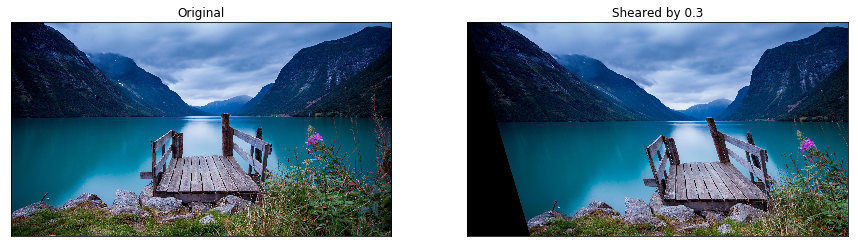

In [5]:
# get shearing matrix with parameter 0.3
shear_mat = tf.AffineTransform(shear=0.3)

# apply shearing
img_sheared = tf.warp(img, inverse_map=shear_mat)

# plot images
ShowImgs([img, img_sheared], ["Original", "Sheared by 0.3"], 1, 2, (15, 15))

### 2-4. Affine Transformation

#### Affine transformations are combinations of
- Linear transformations and Translation
- Can be represented as a 3x3 matrix form with **Homogeneous Coordinates** (kind of trick : add one more coords)

<br/>

$$
\begin{bmatrix}
x' \\
y' \\
w
\end{bmatrix} =
\begin{bmatrix}
a & b & c \\
d & e & f \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
w
\end{bmatrix}
$$

<br/>

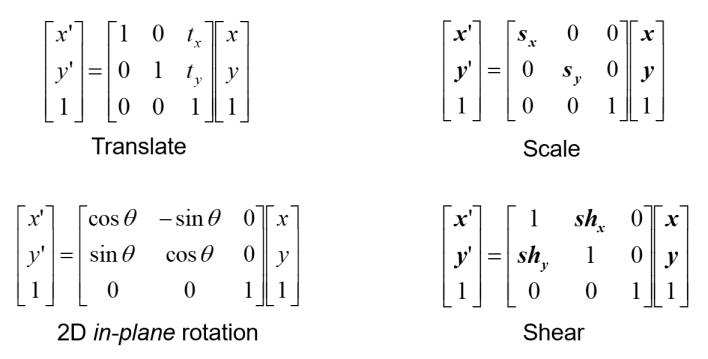

<br/>

#### Properties of Linear Transformation
- **Origin does not necessarily map to origin**
- Lines map to lines
- Parallel lines remain parallel
- Ratios are preserved
- Closed under composition

##### 2-4-1. Translation

$$
T = 
\begin{bmatrix}
1 & 0 & t_{x} \\
0 & 1 & t_{y} \\
0 & 0 & 1
\end{bmatrix}
$$

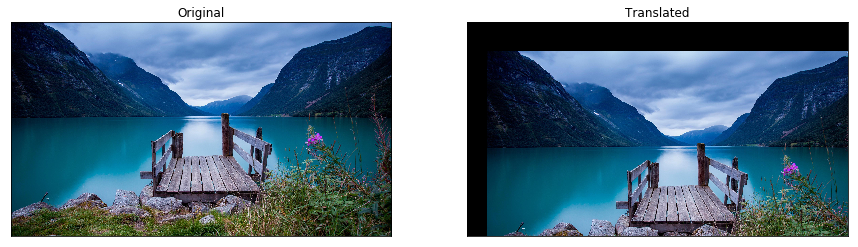

In [6]:
# get translation matrix (move 200 pixels along x-axis, 300 pixels along y-axis)
# we only use 2x3 matrix because last row is fixed as [0, 0, 1]
trans_mat = np.float32([[1,0,200],[0,1,300]])
img_translated = cv2.warpAffine(img, trans_mat, (cols, rows))

# plot images
ShowImgs([img, img_translated], ["Original", "Translated"], 1, 2, (15, 15))

##### 2-4-2. Translation with Rotation

In [7]:
# get affine matrix (we will apply rotation first and translation later)
theta = -np.pi/6
rot_mat = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
trans_mat = np.array([[1, 0, 200], [0, 1, 300], [0, 0, 1]])
rot_trans_mat = np.dot(trans_mat, rot_mat)
rot_trans_mat

array([[  0.8660254,   0.5      , 200.       ],
       [ -0.5      ,   0.8660254, 300.       ],
       [  0.       ,   0.       ,   1.       ]])

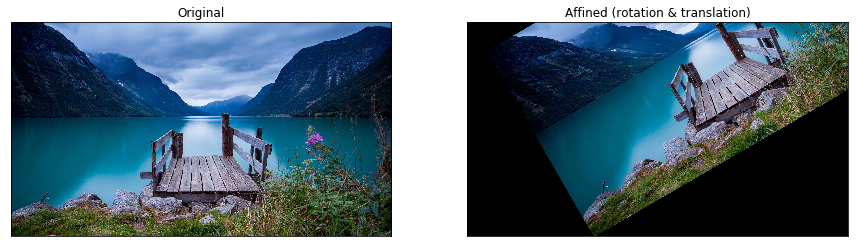

In [8]:
# apply affine transformation
img_affined = cv2.warpAffine(img, rot_trans_mat[:2], (cols, rows))
ShowImgs([img, img_affined], ["Original", "Affined (rotation & translation)"], 1, 2, (15, 15))

### 2-5. Perspective Transformation (Homographies)

#### Is this an affine transformation?

<br/>

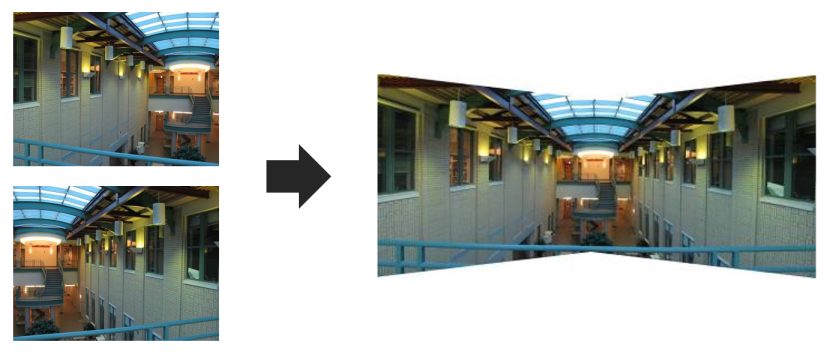

<br/>

#### No, It doesn't preserve the parallel lines
- How to figure out what happened, we need to go further with the matrix we defined in Affine Transformation
- Change the last row of affine matrix to undetermined form
- This is called **Homography**

<br/>

$$
H = 
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & 1
\end{bmatrix}
$$

<br/>

#### Homographies are combination of
- Affine transformations and projective warps
- also called planar perspective map

<br/>

$$
\begin{bmatrix}
x' \\
y' \\
w'
\end{bmatrix} =
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix} =
\begin{bmatrix}
ax + by + c \\
dx + ey + f \\
gx + hy + 1
\end{bmatrix} 
\approx
\begin{bmatrix}
\frac{ax+by+c}{gx+hy+1} \\
\frac{dx+ey+f}{gx+hy+1} \\
1
\end{bmatrix}
$$

<br/>

#### Properties of Linear Transformation
- **Origin does not necessarily map to origin**
- Lines map to lines
- **Parallel lines do not necessarily remain parallel**
- **Ratios are not preserved**
- Closed under composition

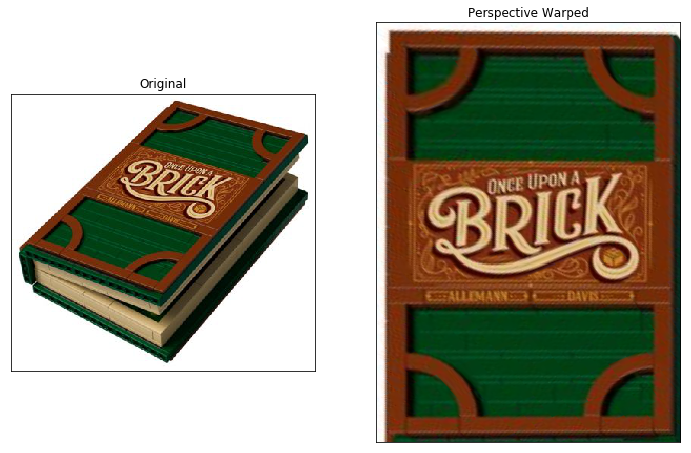

In [9]:
# load an image
img = cv2.imread("images/book.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# designate points for getting H matrix (points are found out in advance)
pts1 = np.float32([[213, 10], [20, 195], [385, 53], [198, 261]])
pts2 = np.float32([[10, 10], [10, 390], [280, 10], [280, 390]])

# apply Homography
H = cv2.getPerspectiveTransform(pts1, pts2)
img_warp = cv2.warpPerspective(img, H, (290, 400))

ShowImgs([img, img_warp], ["Original", "Perspective Warped"], 1, 2, (12, 12))

### 2-6. Summary

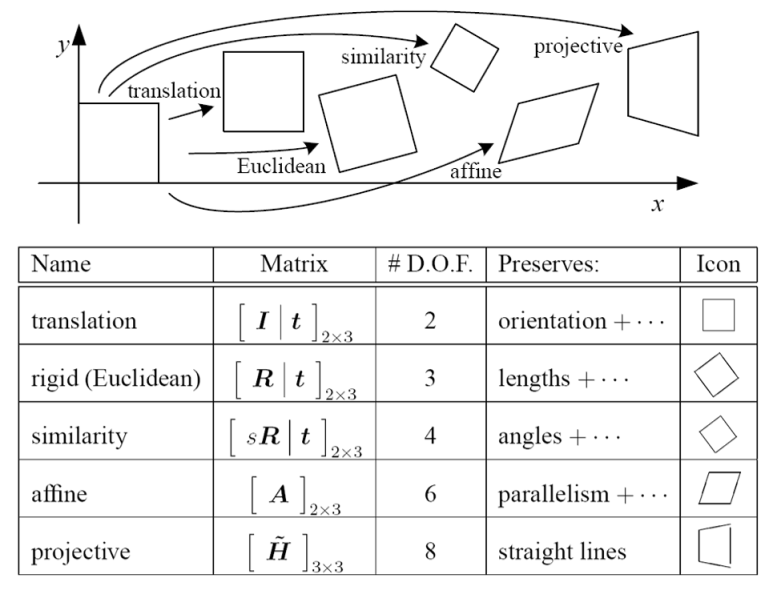

---------------------

## 3. Interpolation

- Given a coordinate transform $(x', y') = T(x, y)$ and a source image $f(x, y)$,
- how do we compute an transformed image $g(x', y') = f(T(x, y))$?

### 3-1. Forward Warping

- Send each pixel $f(x)$ to its corresponding location $(x', y') = T(x, y)$ in $g(x', y')$

<br/>

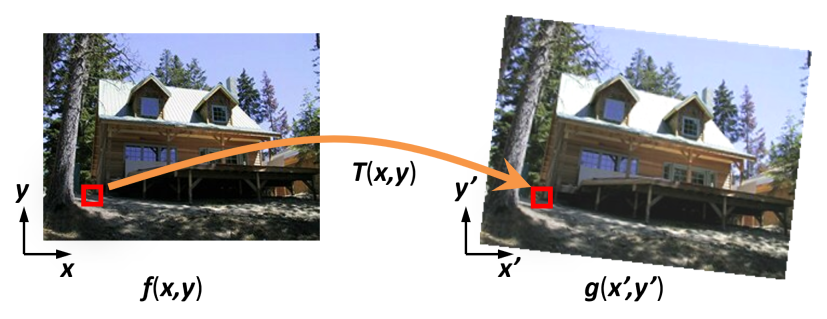

<br/>

- What if pixel lands **"between"** two pixels?
    - Add "contribution" to several pixels, normalize later (splatting)
- However, it can still result in holes

### 3-2. Inverse Warping

- Get each pixel $g(x')$ from its corresponding location $x' = h(x)$ in $f(x)$

<br/>

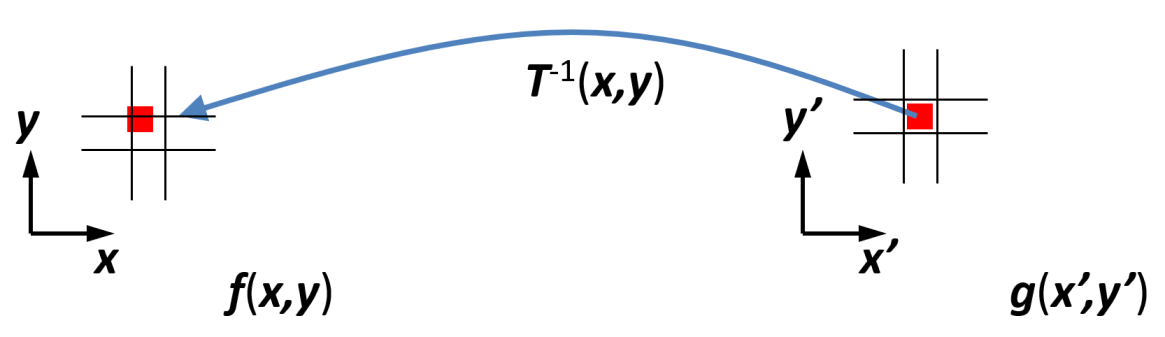

<br/>

- What if pixel comes from **"between"** two pixels?
    - Resample color value from interpolated(prefiltered) source image
    - Linear / Gaussian filter can be used